# I. Numpy

### Импортируйте NumPy

In [1]:
import numpy as np

### Создайте одномерный массив размера 10, заполненный нулями и пятым элемент равным 1. Трансформируйте в двумерный массив.

In [17]:
array = np.zeros((1,10))[0]
array[5] = 1
print(array.shape)
array= array.reshape(5,2)
array

(10,)


array([[0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.]])

### Создайте одномерный массив со значениями от 10 до 49 и разверните его (первый элемент становится последним). Найдите в нем все четные элементы.

In [38]:
array = np.arange(10,50)
array = array [::-1]
even_array = array [1::2]
array
even_array


array([48, 46, 44, 42, 40, 38, 36, 34, 32, 30, 28, 26, 24, 22, 20, 18, 16,
       14, 12, 10])

### Создайте двумерный массив 3x3 со значениями от 0 до 8

In [41]:
array = np.arange (0,9)
array = array.reshape(3,3)
array

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

### Создайте массив 4x3x2 со случайными значениями. Найти его минимум и максимум.

In [47]:
array = np.random.rand(4, 3, 2)
array
print('max: ',array.max())
print('min: ', array.min())

max:  0.9771609566896015
min:  0.0775956896247183


### Создайте два двумерных массива размерами 6x4 и 4x3 и произведите их матричное умножение. 

In [49]:
a1 = np.random.rand(6,4)
a2 = np.random.rand(4,3)
res = np.matmul(a1,a2)
res


array([[1.24644878, 0.94450412, 0.99481619],
       [0.69393752, 0.66931169, 0.52961013],
       [0.8230217 , 0.89573944, 0.63429291],
       [1.36200751, 1.16661162, 0.92094762],
       [1.40065179, 1.3019301 , 1.04337259],
       [1.73235654, 1.50783913, 1.37045519]])

### Создайте случайный двумерный массив 7x7, найти у него среднее и стандартное оклонение. Нормализуйте этот массив.

In [19]:
a = np.random.rand(7, 7)
mean_a = np.mean(a)
mean_a 
std= np.std(a)
std

norm= np.linalg.norm(a)
norm

3.8840610616387337

# II. Pandas

### Импортируйте: pandas, matplotlib, seaborn

In [2]:
import pandas as pd,matplotlib as mp, seaborn as sb

### Загрузите датасет Tips из набора датасетов seaborn

In [3]:
data = sb.load_dataset("tips")
data


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Посмотрите на первые 5 строчек

In [52]:
data.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Узнайте сколько всего строчек и колонок в данных

In [53]:
rows_len = len(data)
rows_len

col = data.shape[1]

### Проверьте есть ли пропуски в данных

In [54]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### Посмотрите на распределение числовых признаков

In [55]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Найдите максимальное значение 'total_bill'

In [60]:
data['total_bill'].max()

50.81

### Найдите количество курящих людей

In [66]:
len(data[data['smoker'] == 'Yes'])

93

### Узнайте какой средний 'total_bill' в зависимости от 'day'

In [68]:
data.groupby('day')['total_bill'].mean()

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

### Отберите строчки с 'total_bill' больше медианы и узнайте какой средний 'tip' в зависимости от 'sex'

In [74]:
bill_med = data['total_bill'].median()
data[data['total_bill'] > bill_med].groupby('sex')['tip'].mean()

sex
Male      3.756404
Female    3.663939
Name: tip, dtype: float64

### Преобразуйте признак 'smoker' в бинарный (0-No, 1-Yes)

In [4]:
data['smoker'] = (data['smoker'] == 'Yes').astype(int)
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,Sun,Dinner,2
1,10.34,1.66,Male,0,Sun,Dinner,3
2,21.01,3.50,Male,0,Sun,Dinner,3
3,23.68,3.31,Male,0,Sun,Dinner,2
4,24.59,3.61,Female,0,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,0,Sat,Dinner,3
240,27.18,2.00,Female,1,Sat,Dinner,2
241,22.67,2.00,Male,1,Sat,Dinner,2
242,17.82,1.75,Male,0,Sat,Dinner,2


# III. Visualization

### Постройте гистограмму распределения признака 'total_bill'

<AxesSubplot:ylabel='Frequency'>

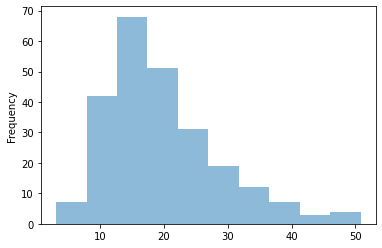

In [32]:
data['total_bill'].plot.hist(alpha = 0.5)

### Постройте scatterplot, представляющий взаимосвязь между признаками 'total_bill' и 'tip'

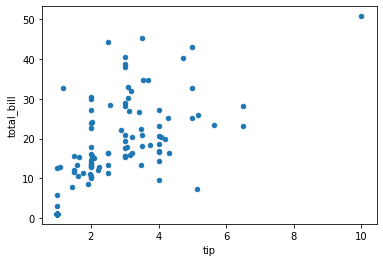

In [110]:
data.plot.scatter(x='tip', y='total_bill');

### Постройте pairplot

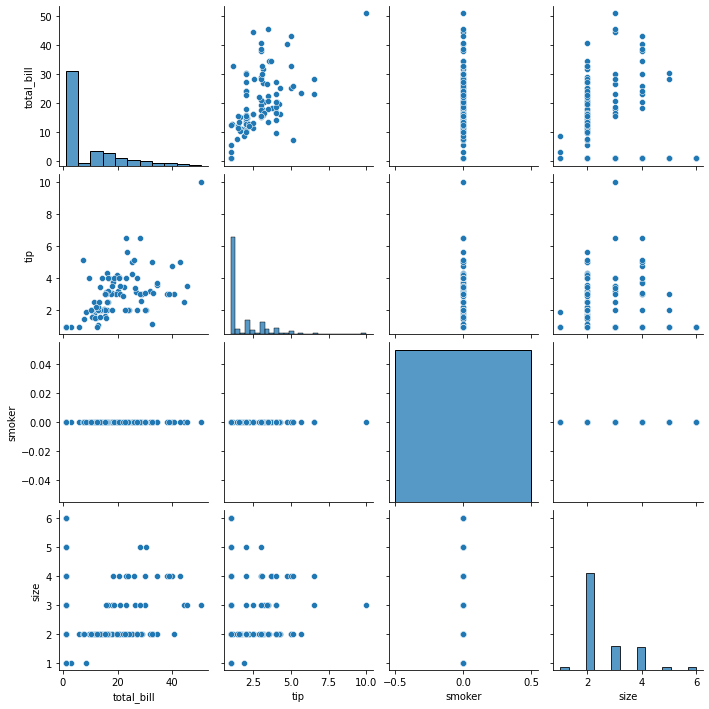

In [114]:
sb.pairplot(data)

### Постройте график взаимосвязи между признаками 'total_bill' и 'day'

<AxesSubplot:xlabel='day'>

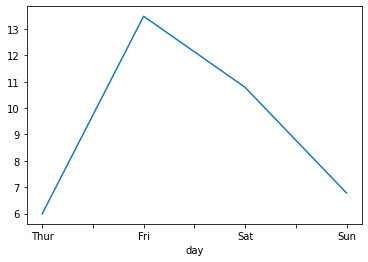

In [121]:
bill_by_day = data.groupby('day')['total_bill'].mean()
bill_by_day.plot(x = 'day', y = 'total_bill')



### Постройте две гистограммы распределения признака 'tip' в зависимости от категорий 'time'

day   time  
Thur  Lunch     2.767705
      Dinner    3.000000
Fri   Lunch     2.382857
      Dinner    2.940000
Sat   Lunch          NaN
      Dinner    2.993103
Sun   Lunch          NaN
      Dinner    3.255132
Name: tip, dtype: float64


day   time  
Thur  Lunch     AxesSubplot(0.125,0.125;0.775x0.755)
      Dinner    AxesSubplot(0.125,0.125;0.775x0.755)
Fri   Lunch     AxesSubplot(0.125,0.125;0.775x0.755)
      Dinner    AxesSubplot(0.125,0.125;0.775x0.755)
Sat   Lunch                                      NaN
      Dinner    AxesSubplot(0.125,0.125;0.775x0.755)
Sun   Lunch                                      NaN
      Dinner    AxesSubplot(0.125,0.125;0.775x0.755)
Name: tip, dtype: object

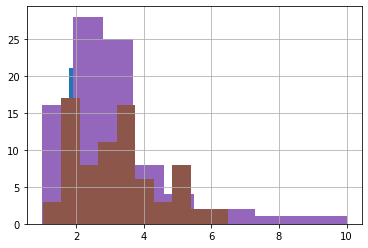

In [43]:
#Lunch
#Dinner

dinner_tip = data.groupby(['day','time'])['tip']

print(dinner_tip.mean())

dinner_tip.hist(grid = True)


### Постройте два графика scatterplot, представляющих взаимосвязь между признаками 'total_bill' и 'tip' один для Male, другой для Female и раскрасьте точки в зависимоти от признака 'smoker'

sex     smoker  tip   total_bill
Male    0       1.25  10.07         AxesSubplot(0.125,0.125;0.775x0.755)
                      10.51         AxesSubplot(0.125,0.125;0.775x0.755)
                1.32  9.68          AxesSubplot(0.125,0.125;0.775x0.755)
                1.44  7.56          AxesSubplot(0.125,0.125;0.775x0.755)
                1.45  9.55          AxesSubplot(0.125,0.125;0.775x0.755)
                                                    ...                 
Female  1       4.19  19.81         AxesSubplot(0.125,0.125;0.775x0.755)
                4.30  16.32         AxesSubplot(0.125,0.125;0.775x0.755)
                5.00  25.28         AxesSubplot(0.125,0.125;0.775x0.755)
                      43.11         AxesSubplot(0.125,0.125;0.775x0.755)
                6.50  28.17         AxesSubplot(0.125,0.125;0.775x0.755)
Length: 243, dtype: object

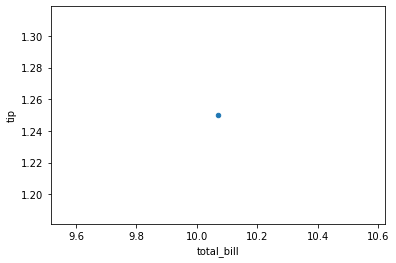

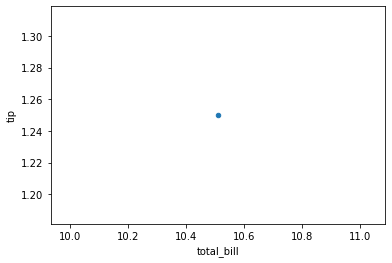

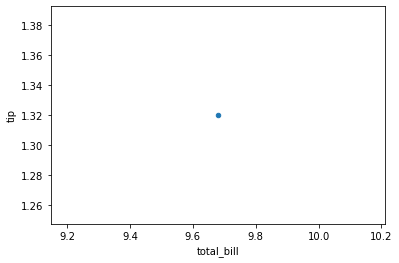

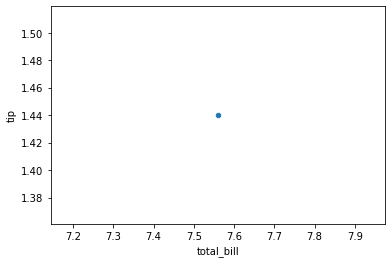

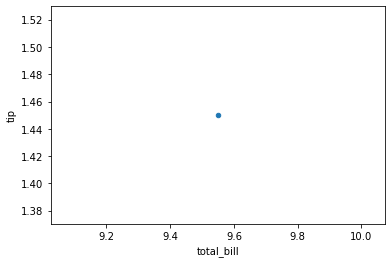

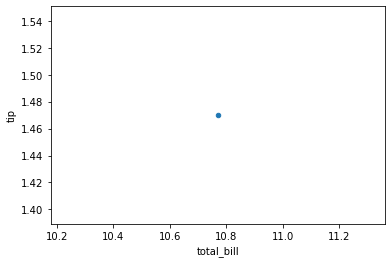

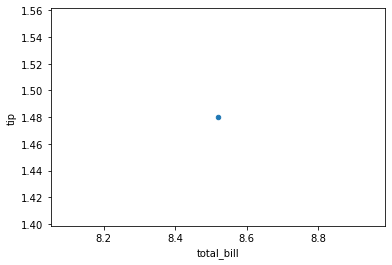

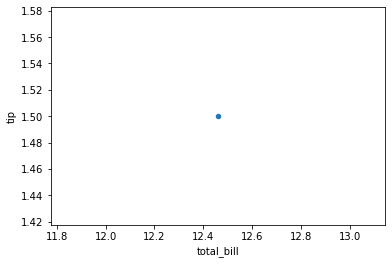

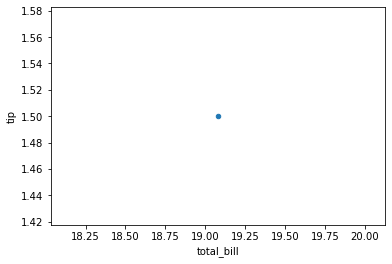

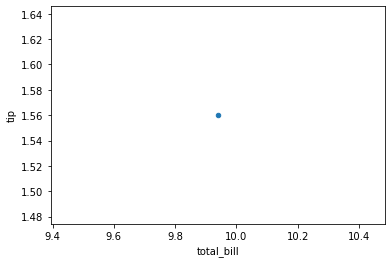

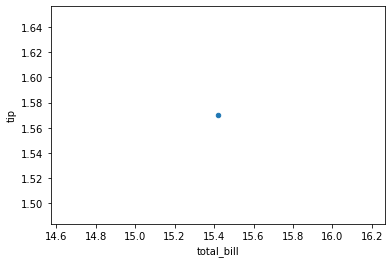

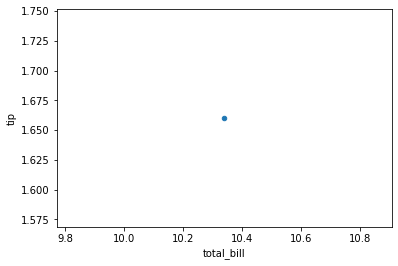

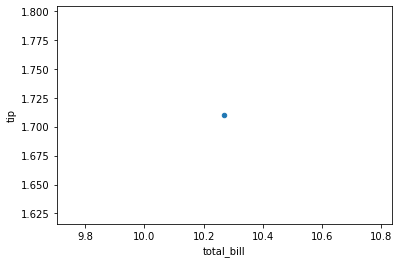

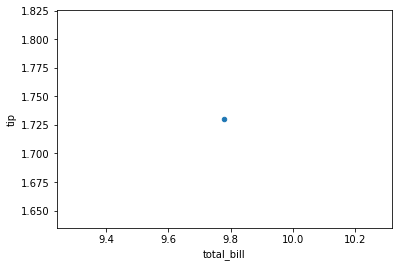

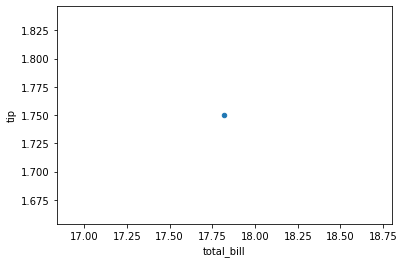

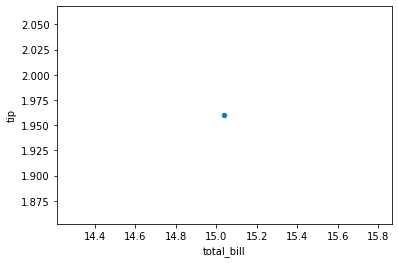

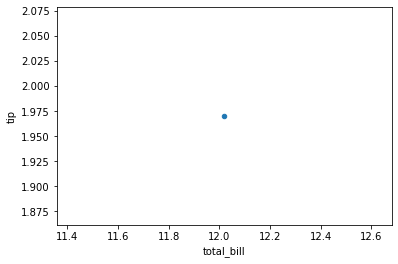

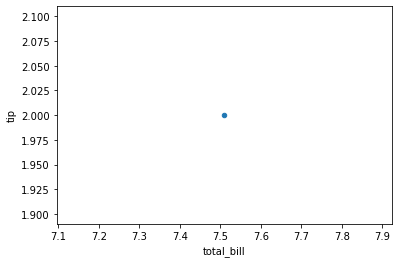

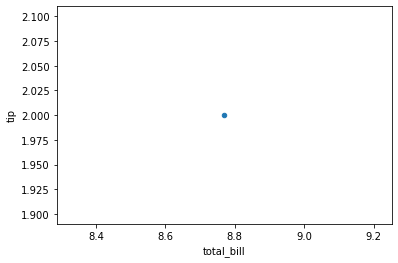

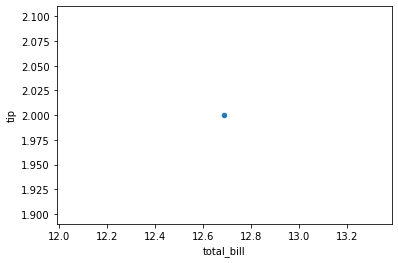

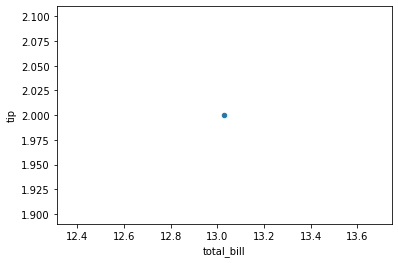

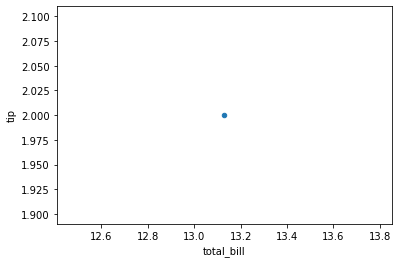

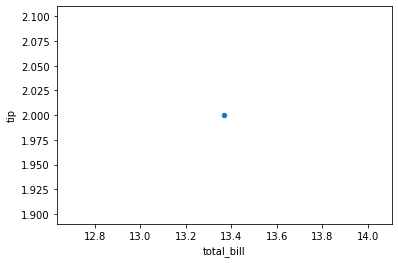

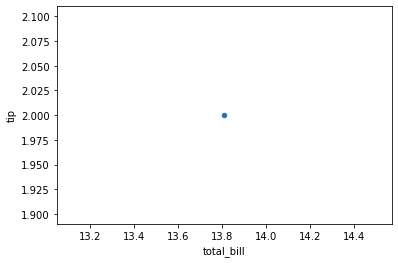

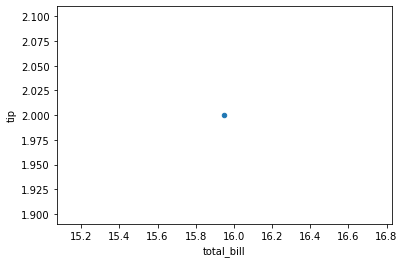

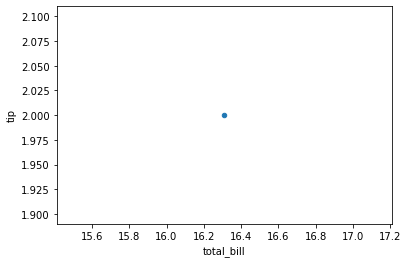

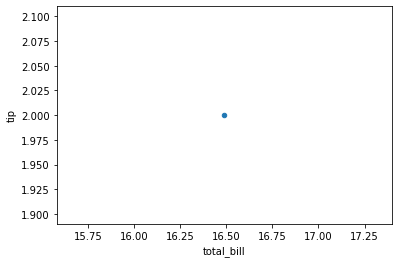

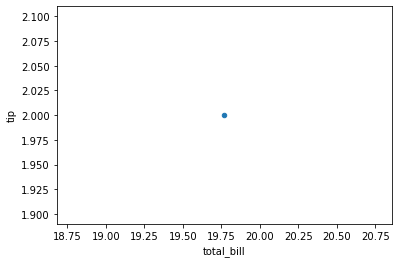

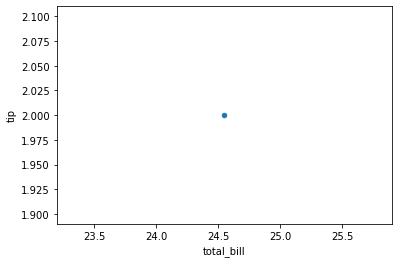

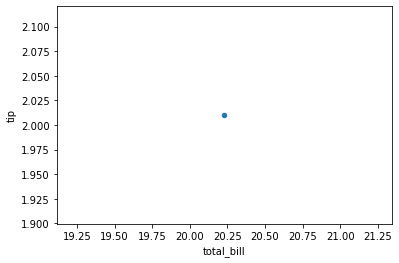

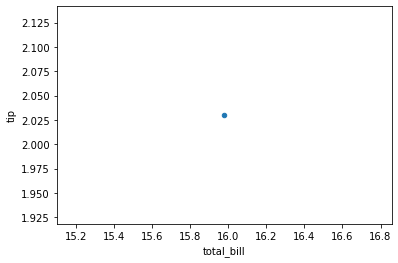

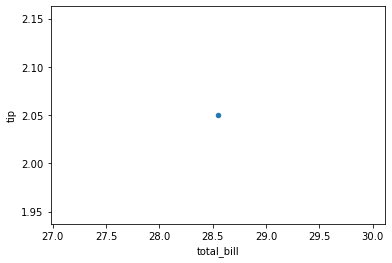

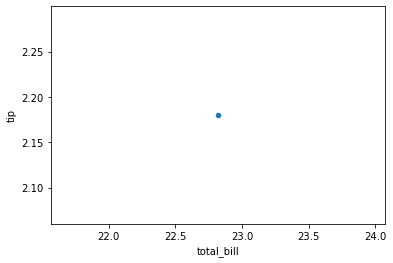

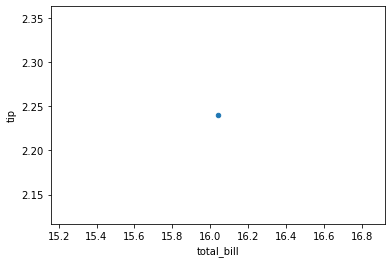

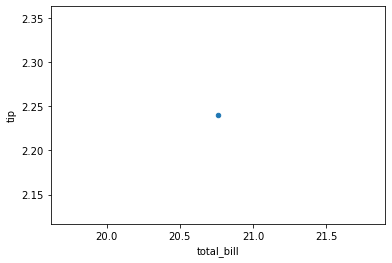

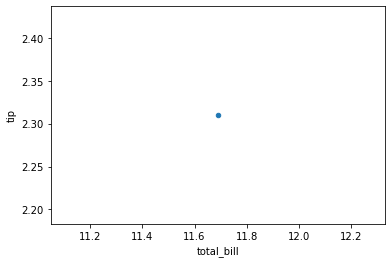

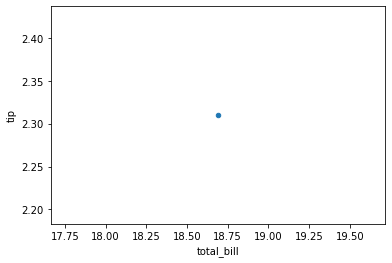

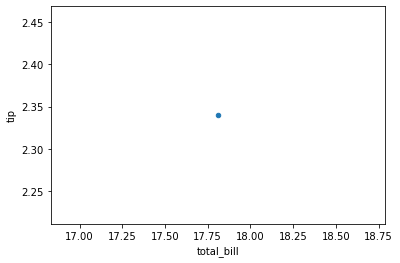

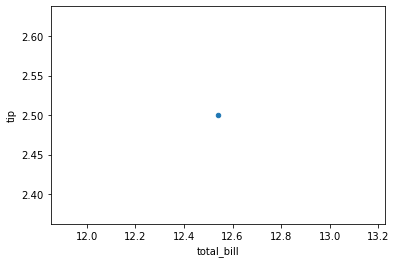

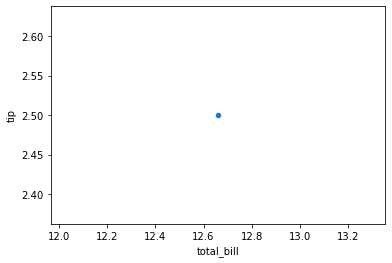

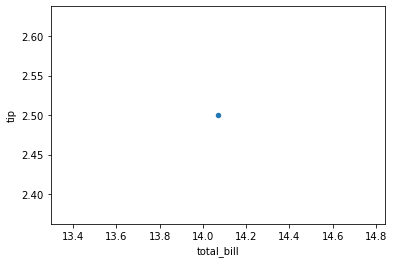

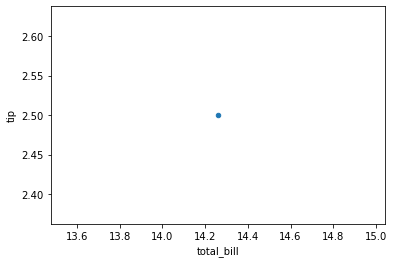

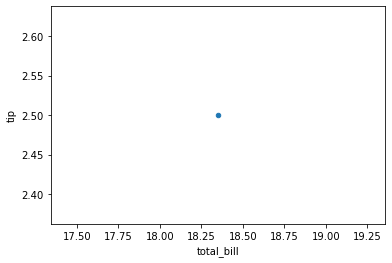

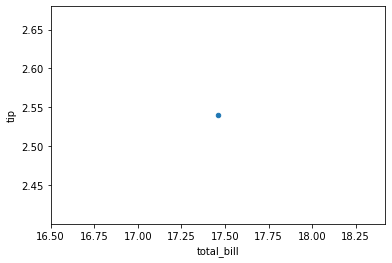

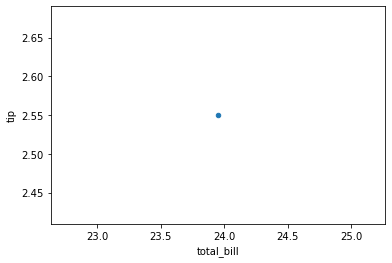

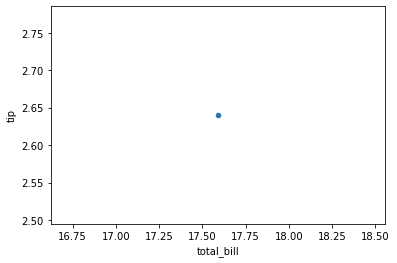

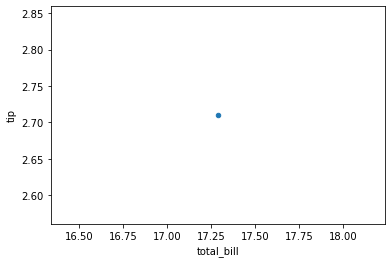

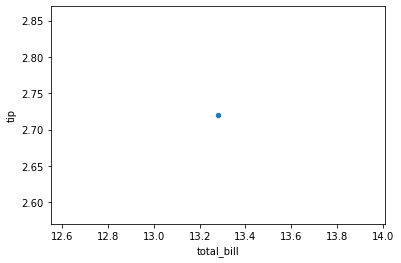

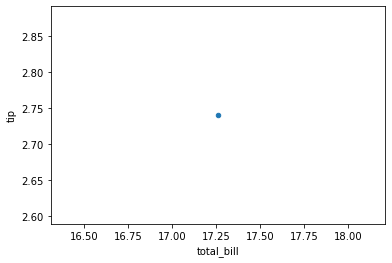

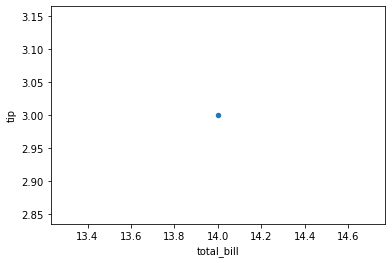

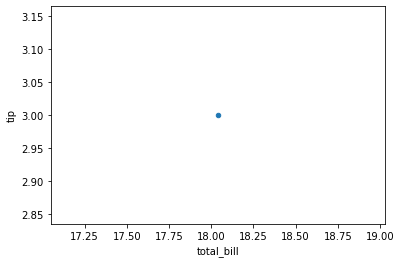

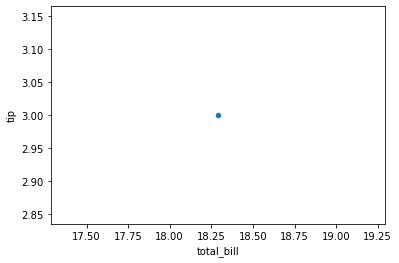

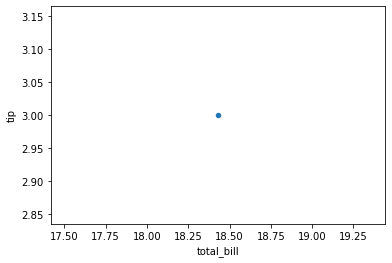

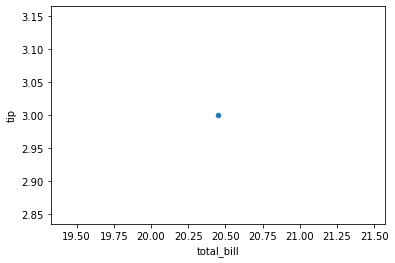

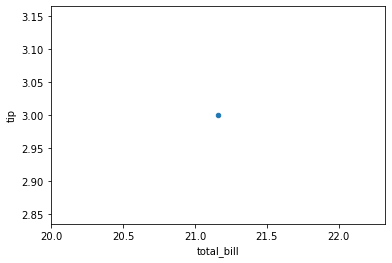

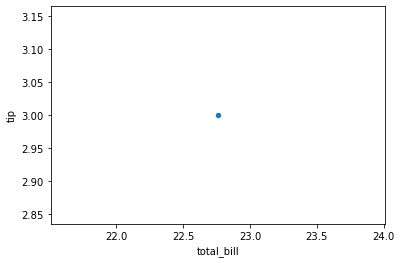

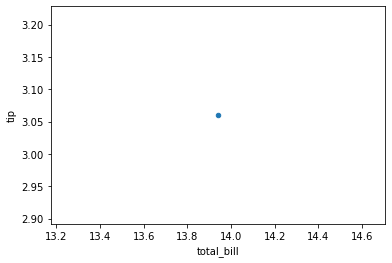

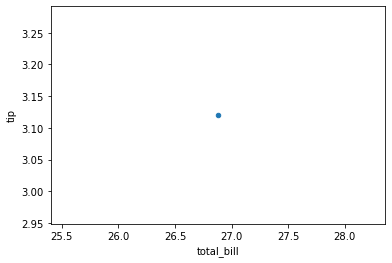

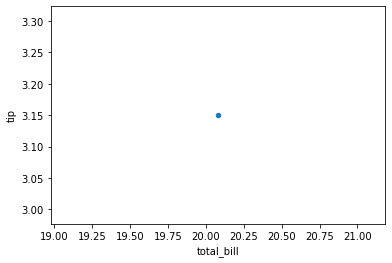

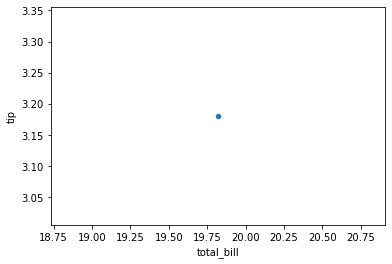

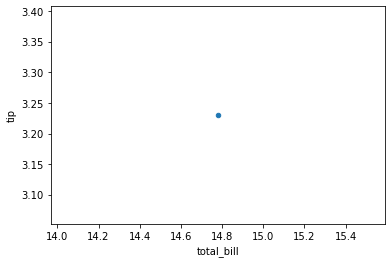

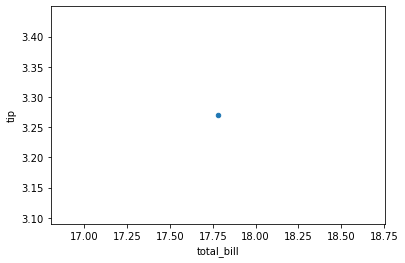

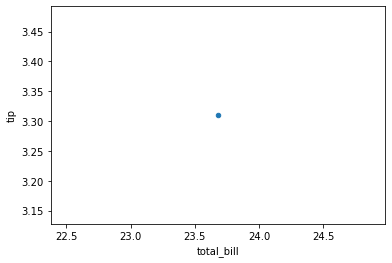

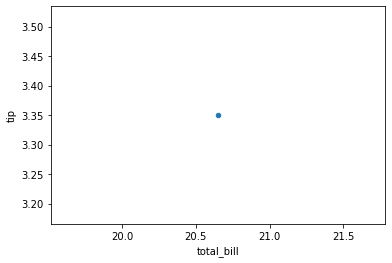

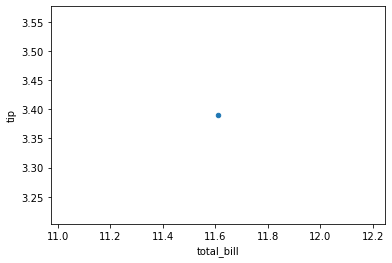

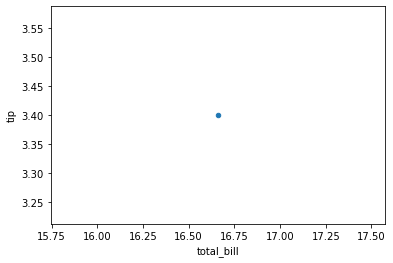

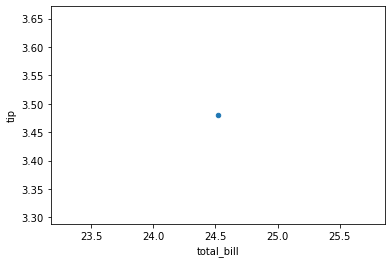

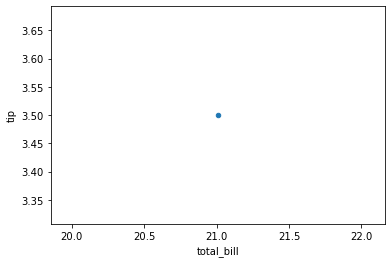

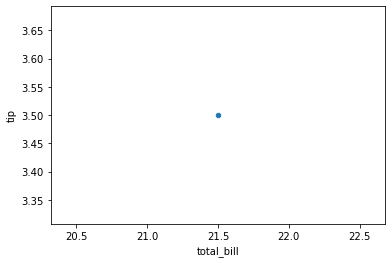

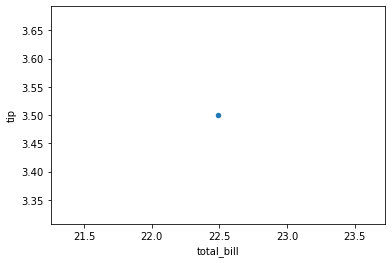

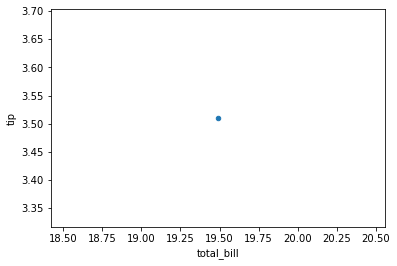

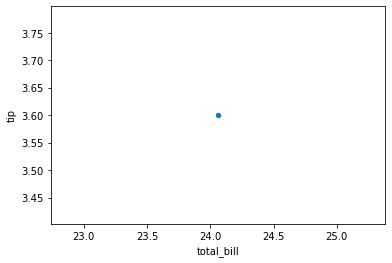

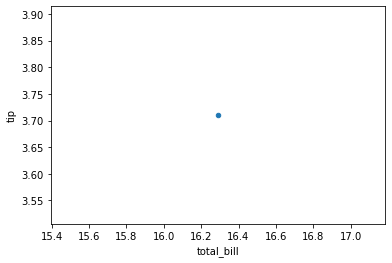

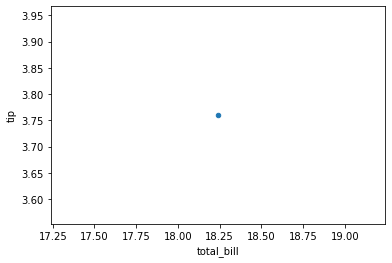

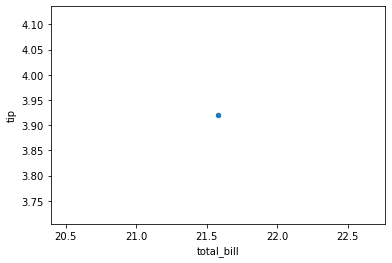

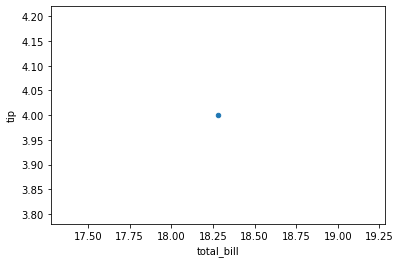

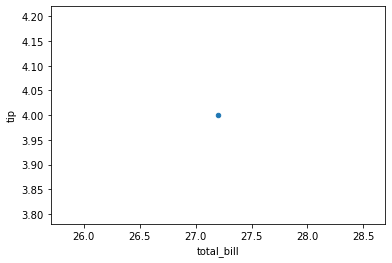

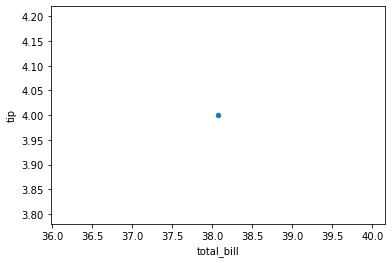

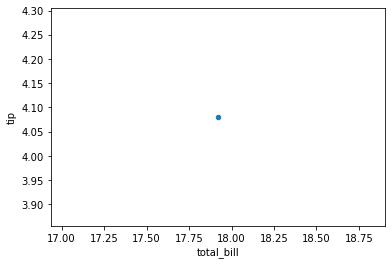

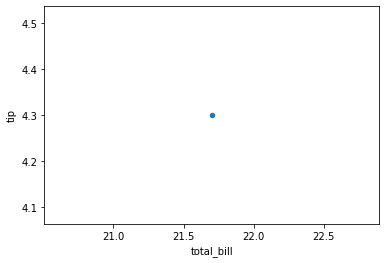

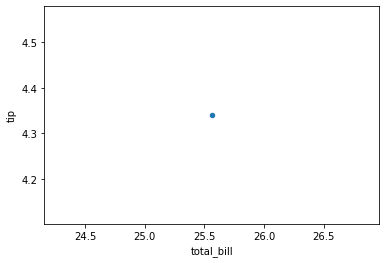

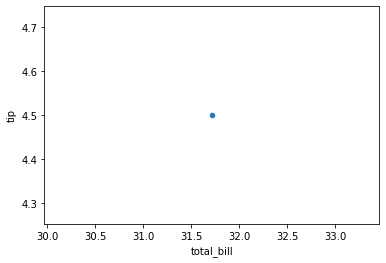

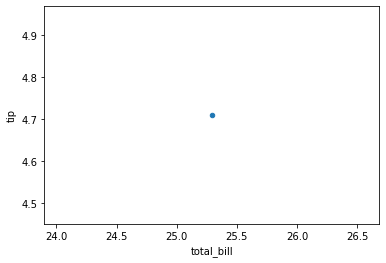

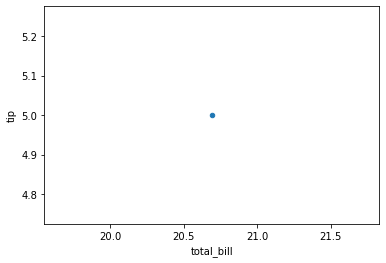

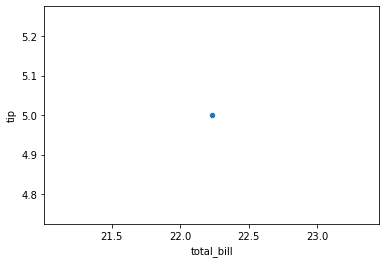

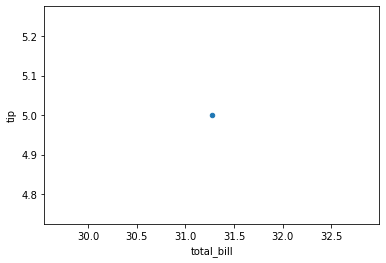

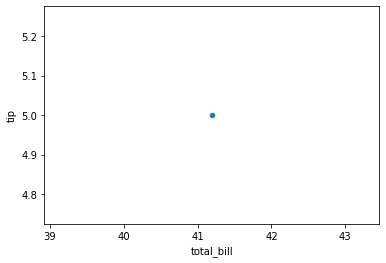

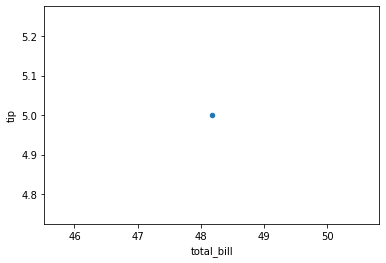

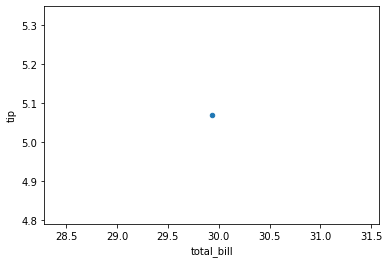

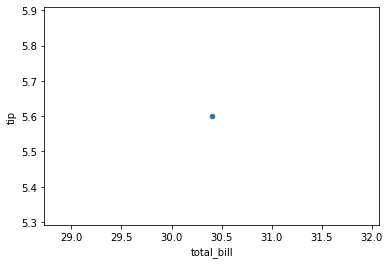

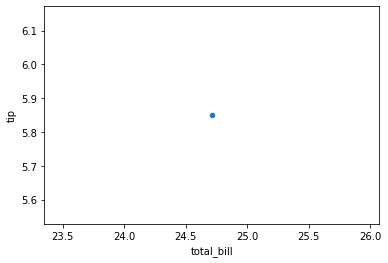

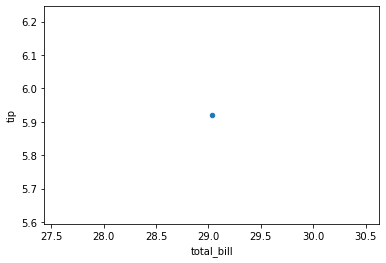

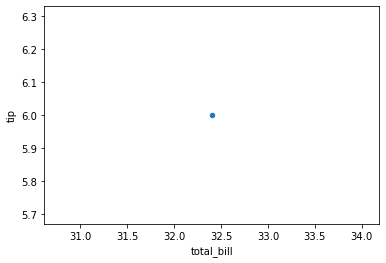

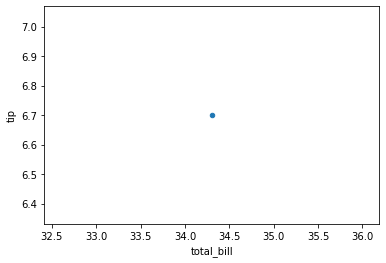

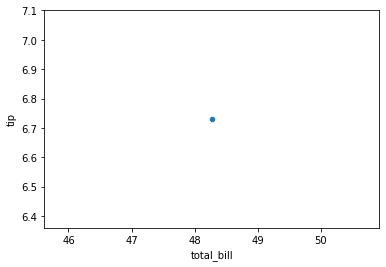

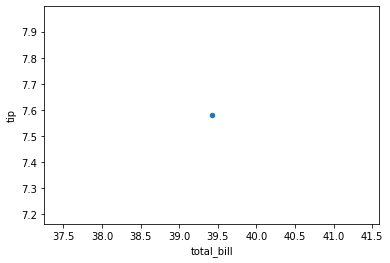

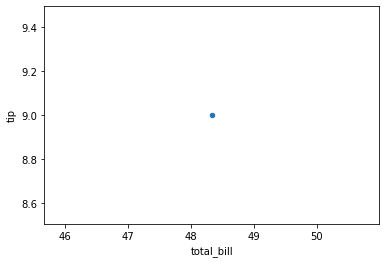

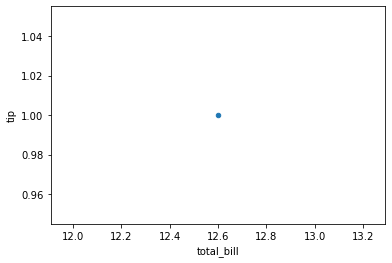

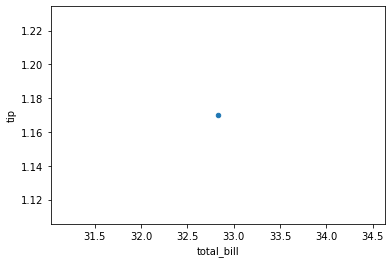

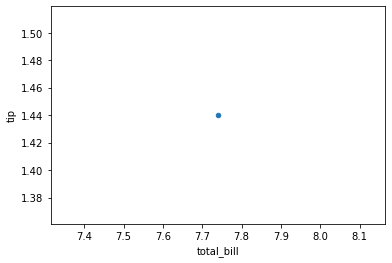

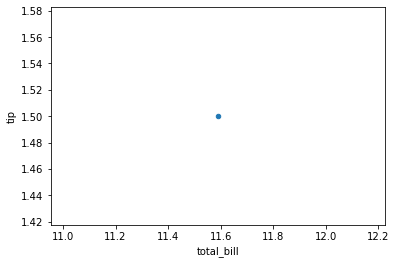

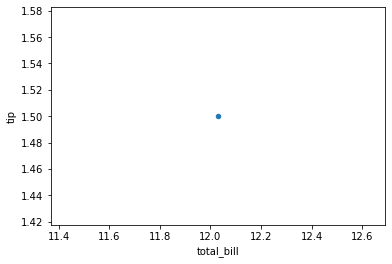

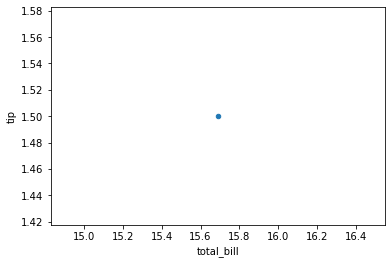

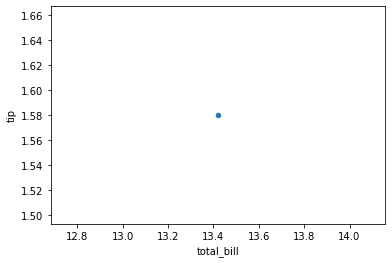

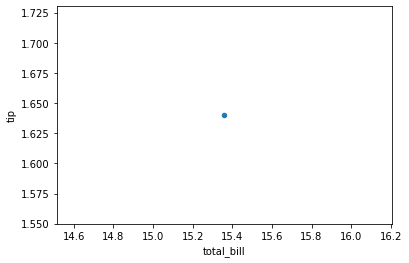

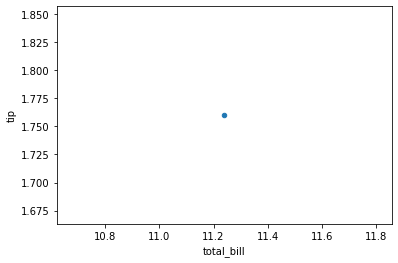

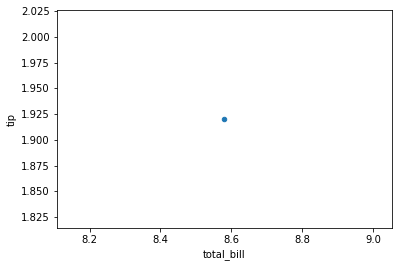

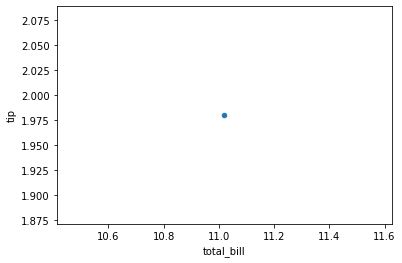

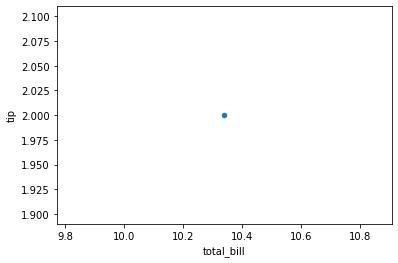

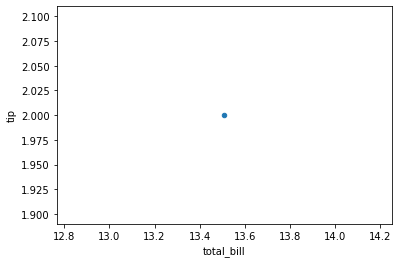

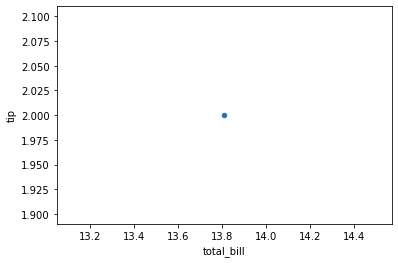

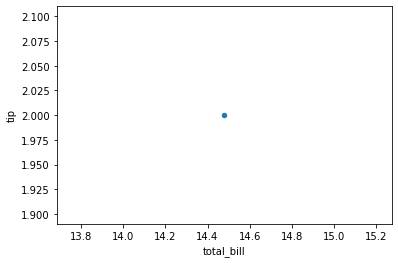

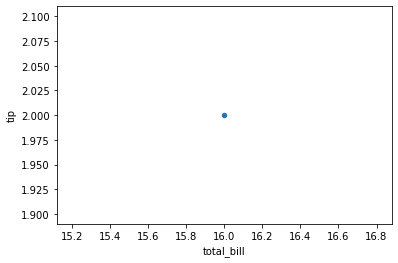

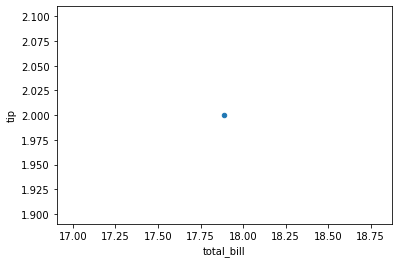

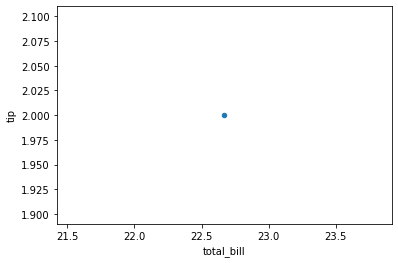

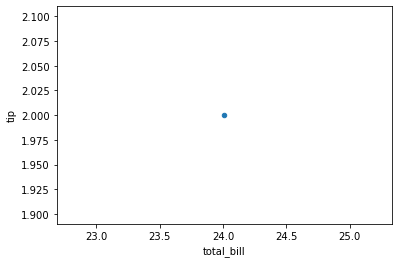

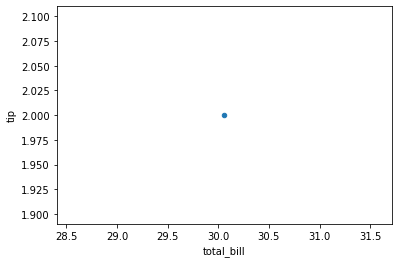

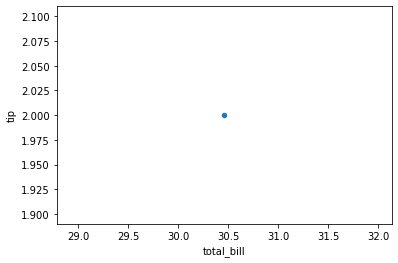

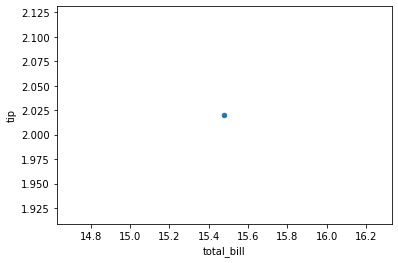

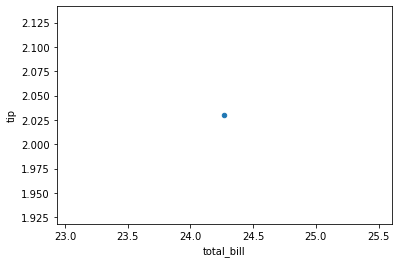

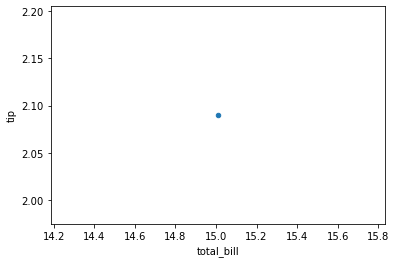

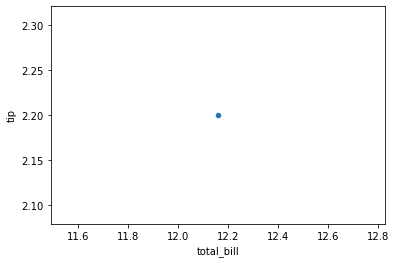

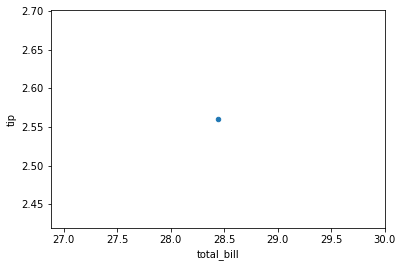

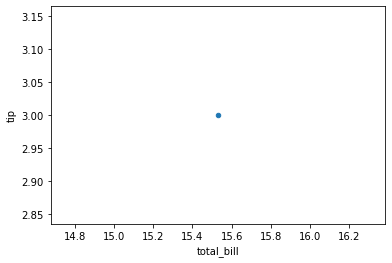

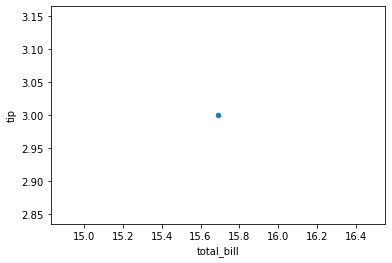

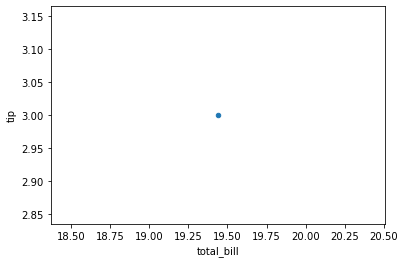

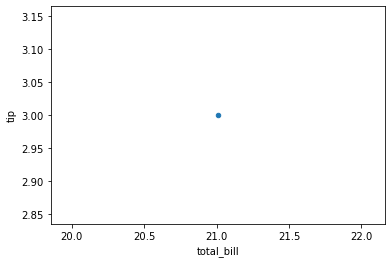

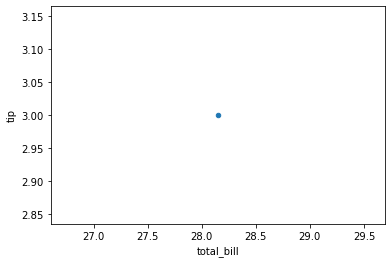

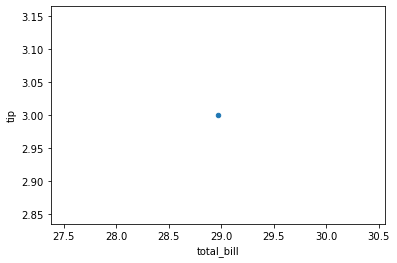

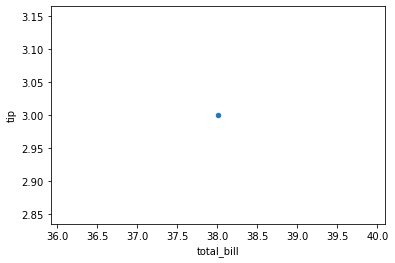

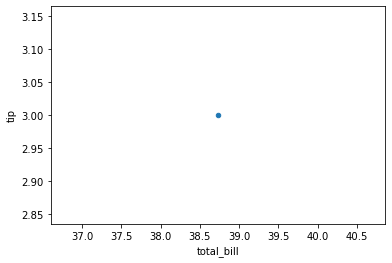

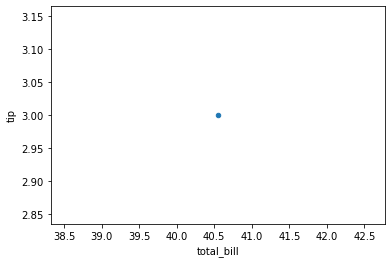

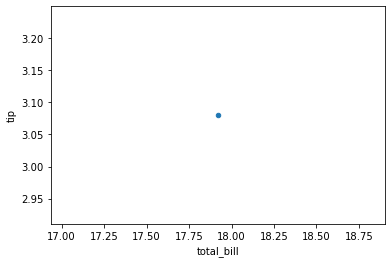

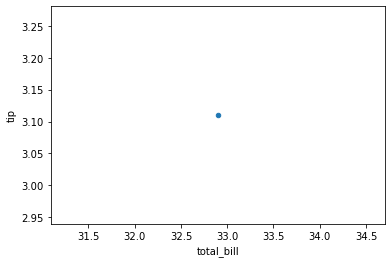

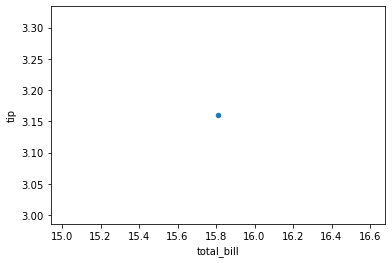

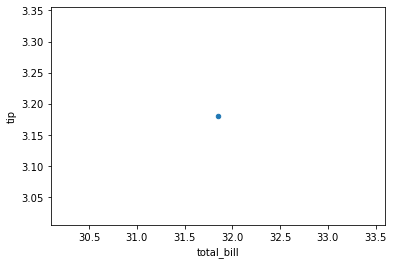

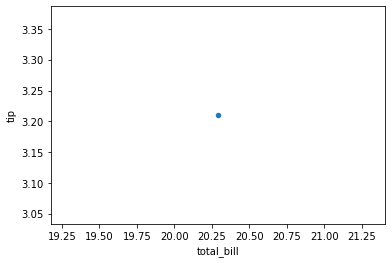

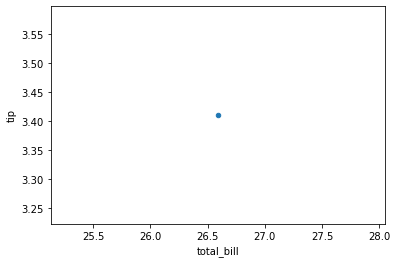

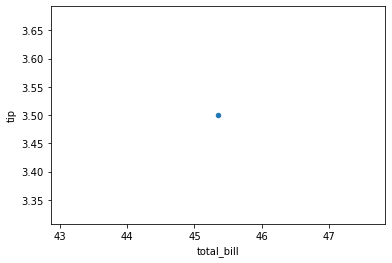

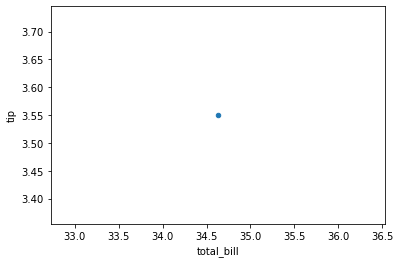

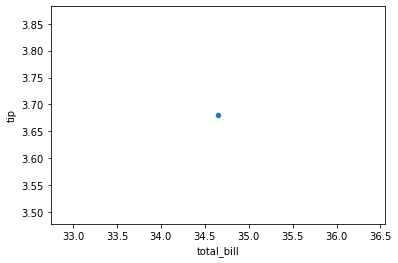

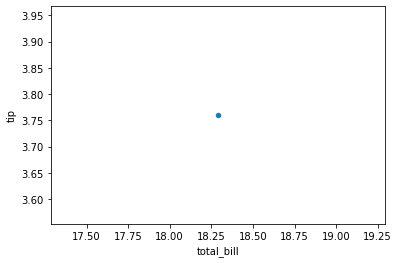

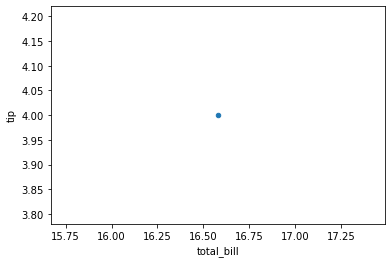

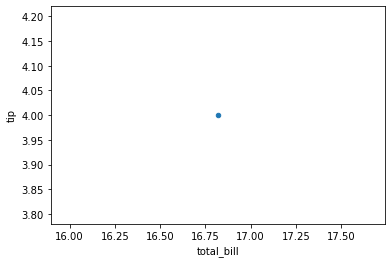

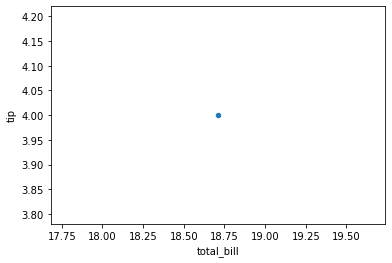

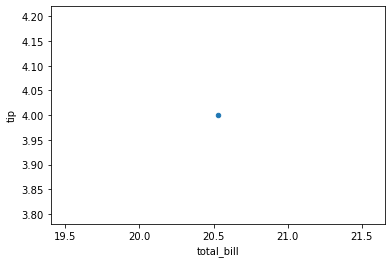

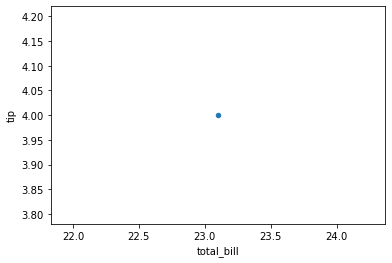

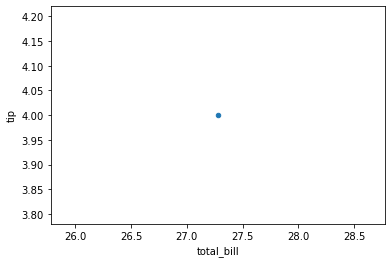

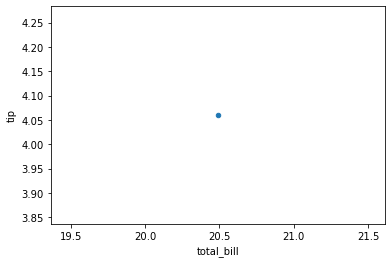

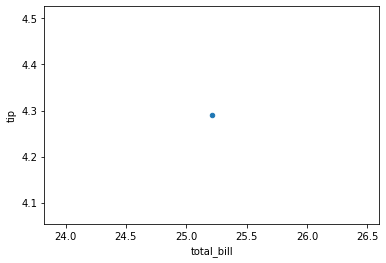

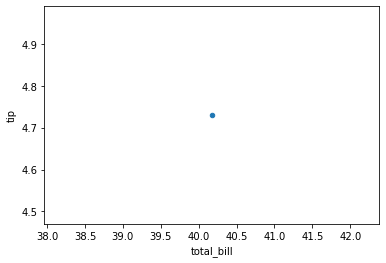

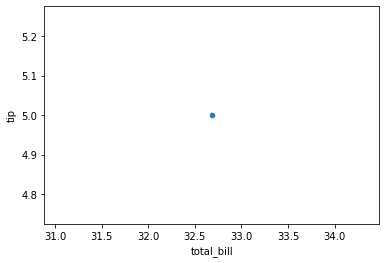

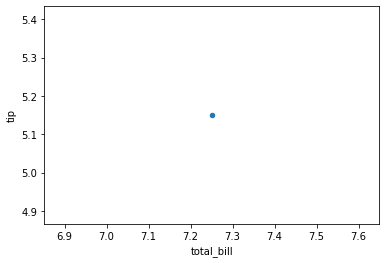

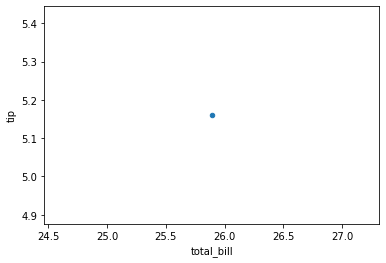

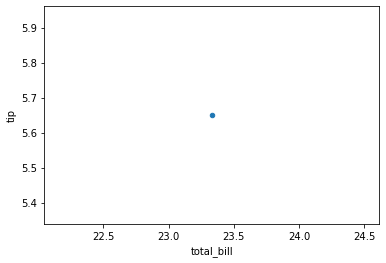

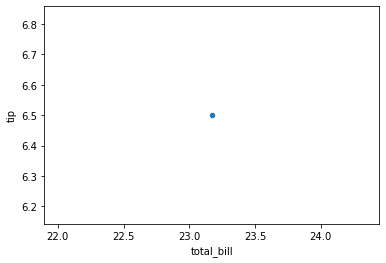

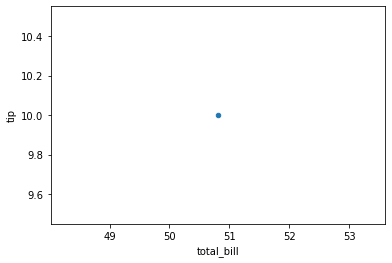

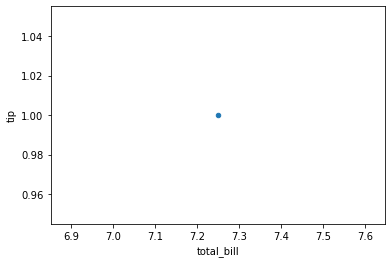

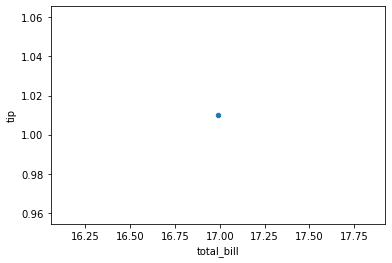

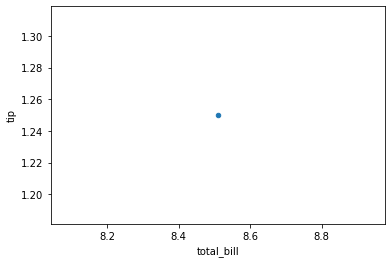

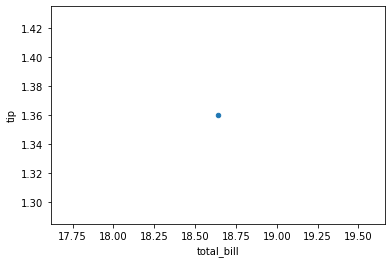

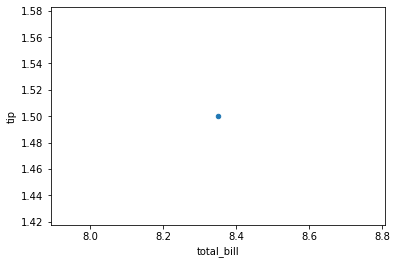

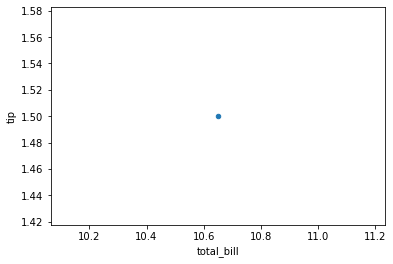

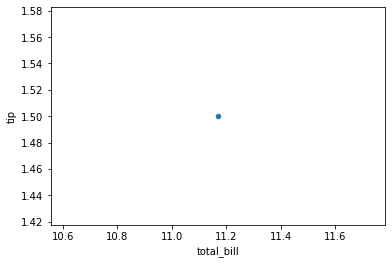

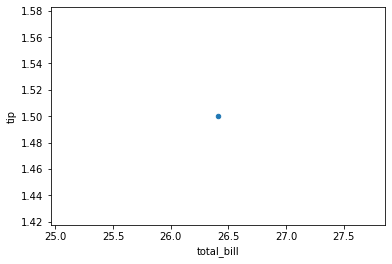

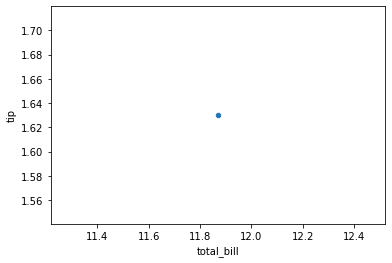

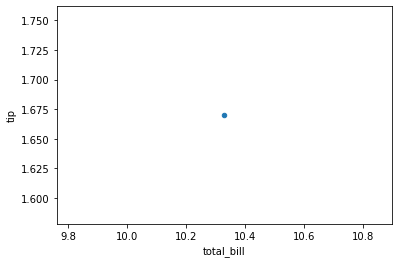

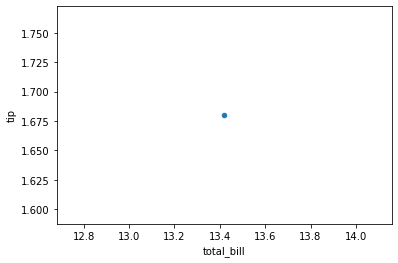

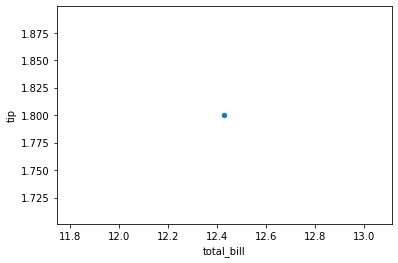

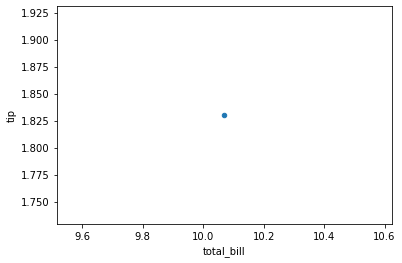

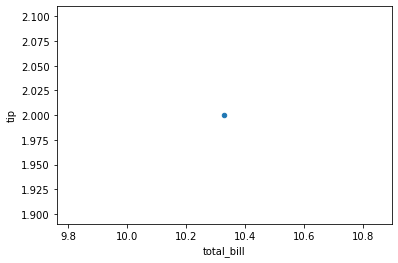

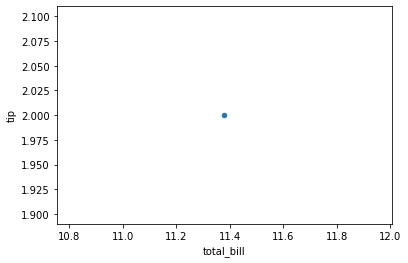

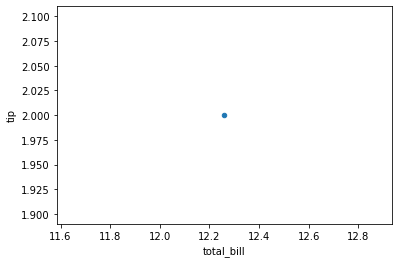

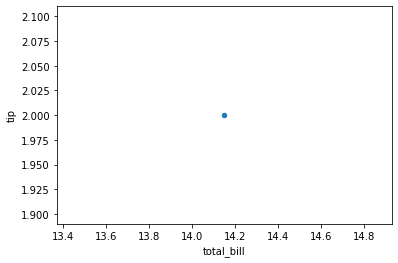

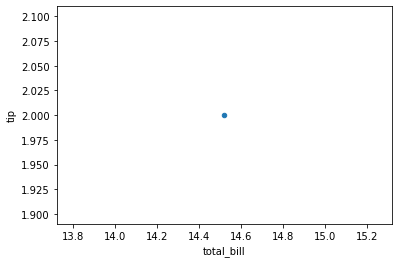

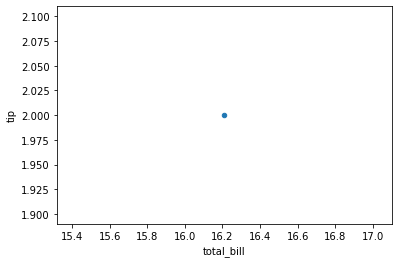

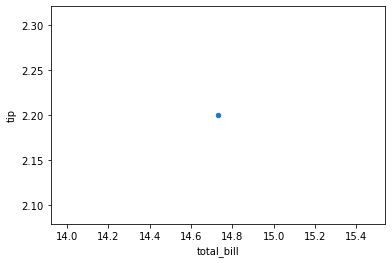

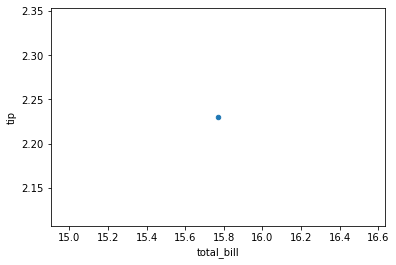

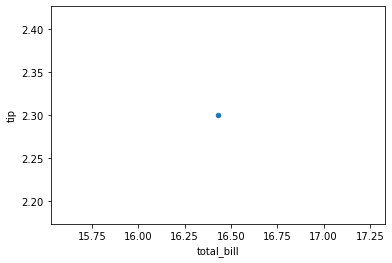

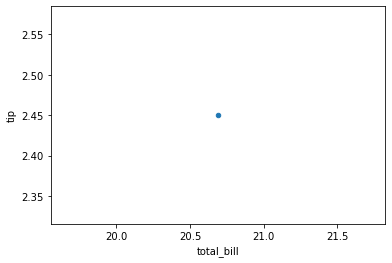

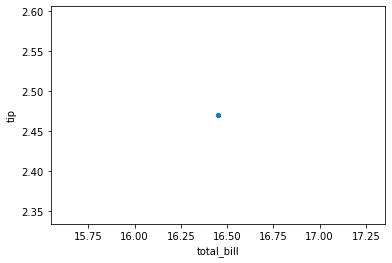

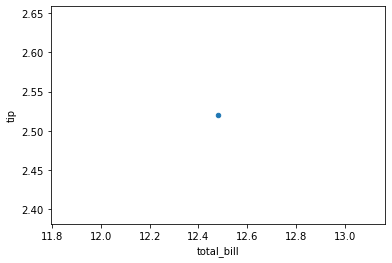

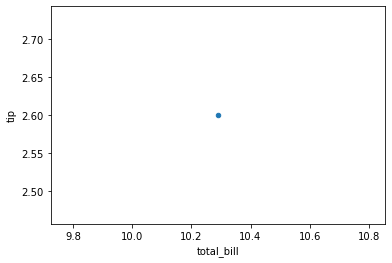

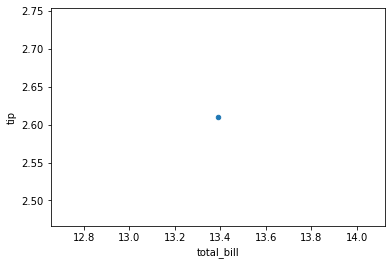

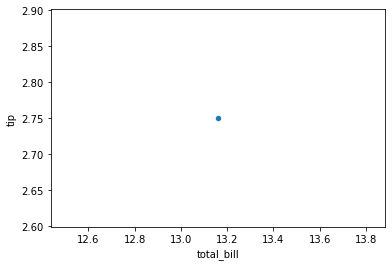

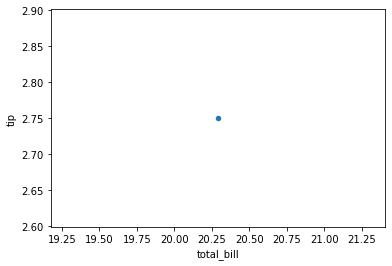

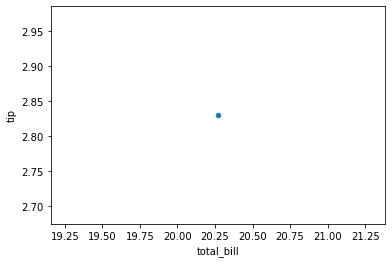

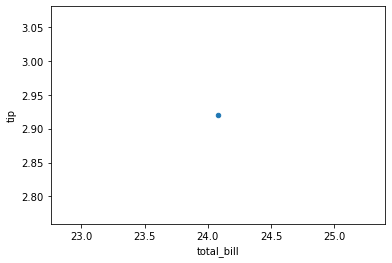

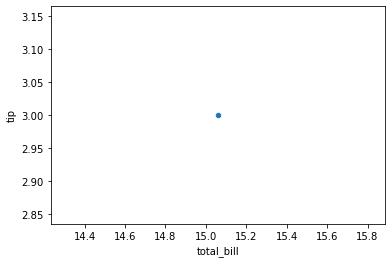

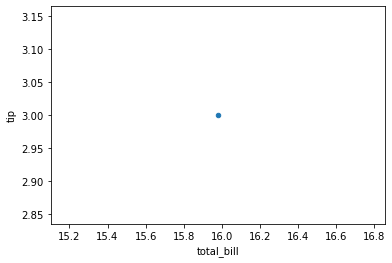

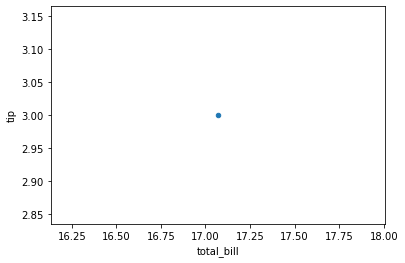

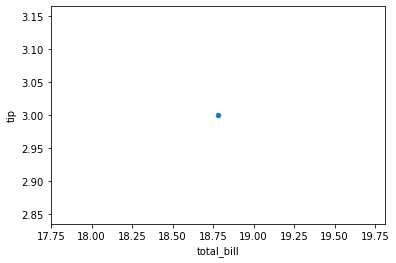

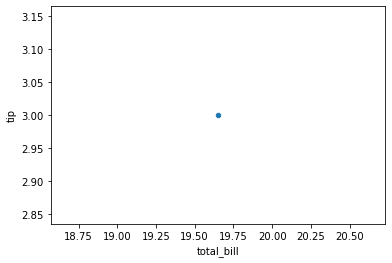

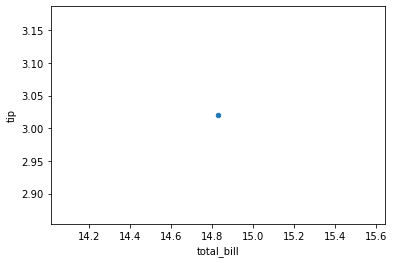

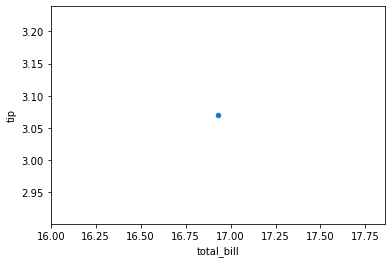

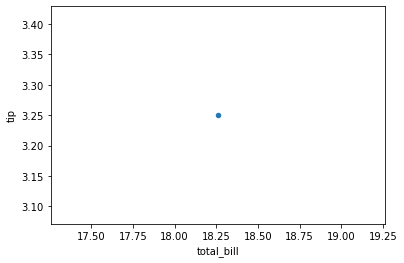

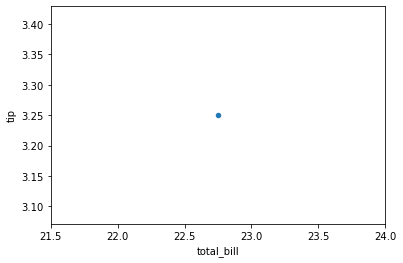

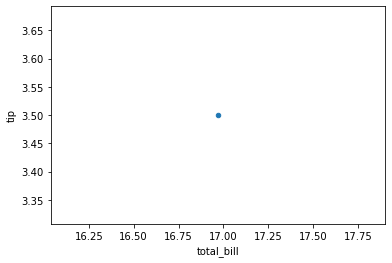

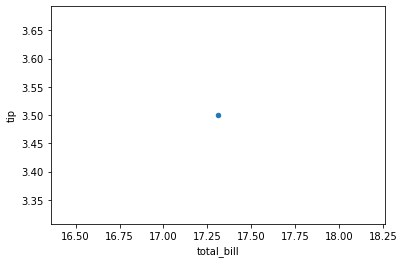

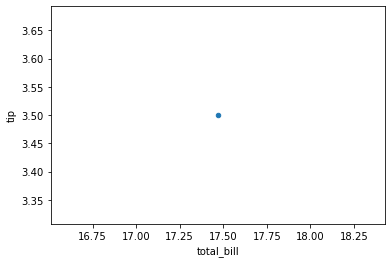

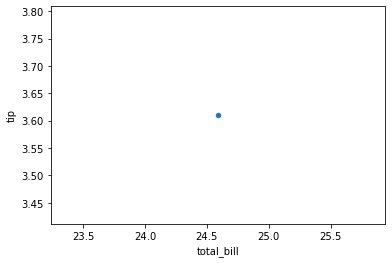

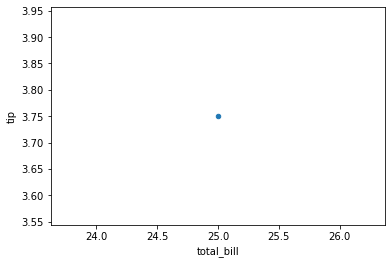

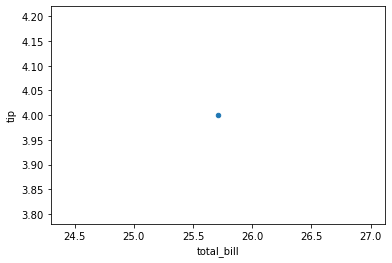

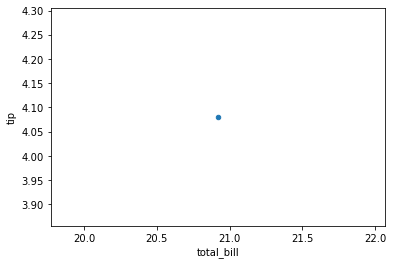

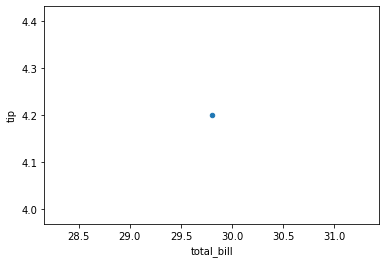

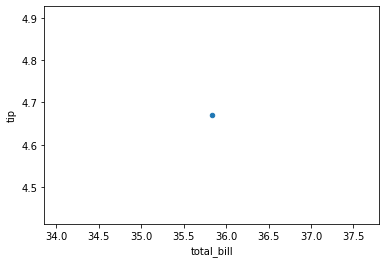

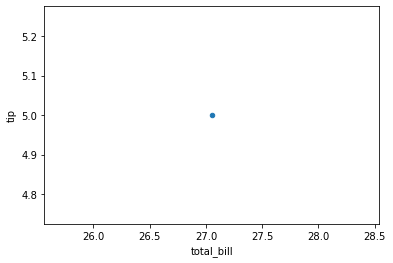

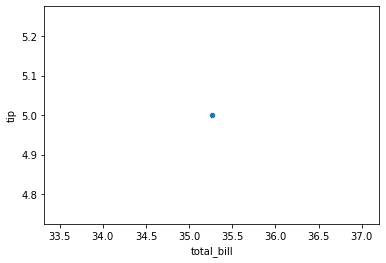

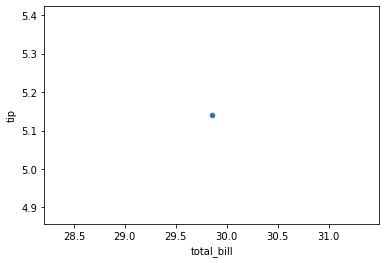

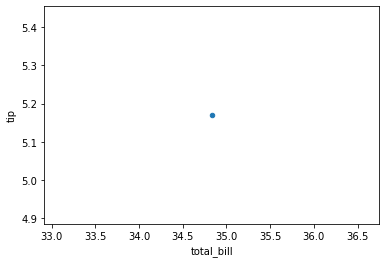

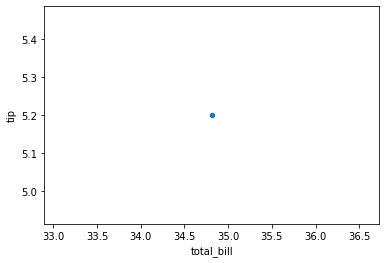

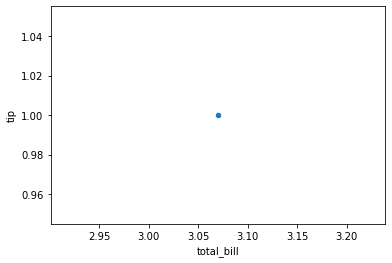

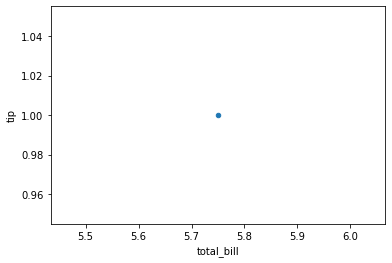

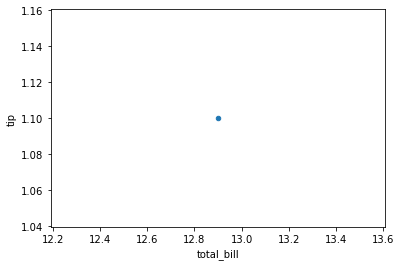

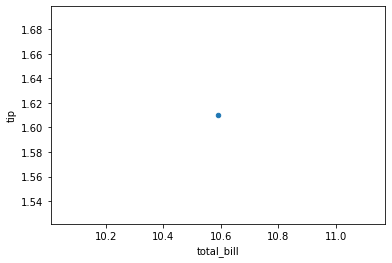

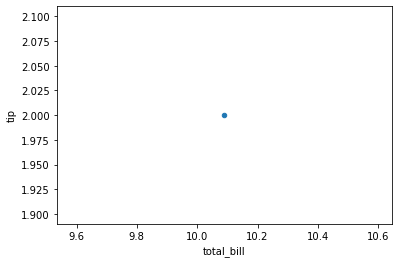

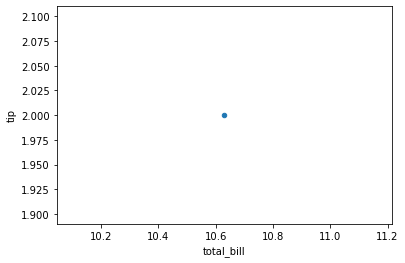

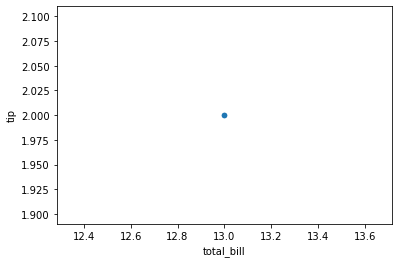

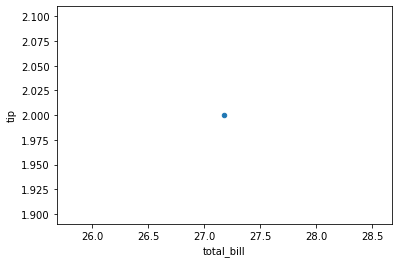

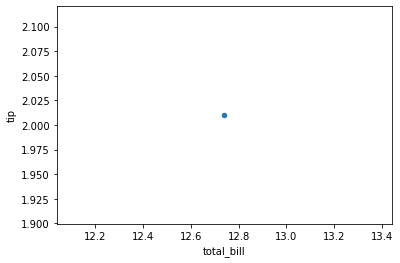

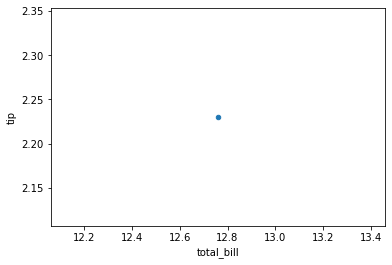

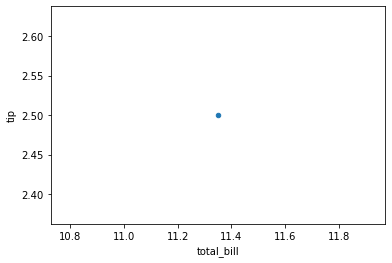

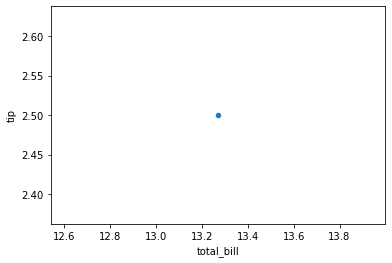

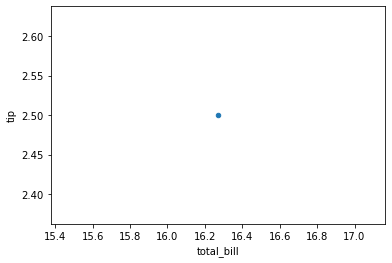

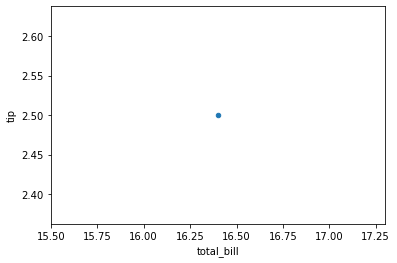

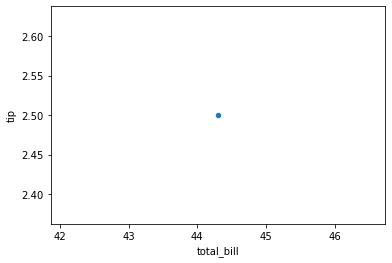

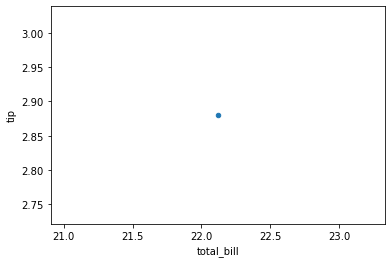

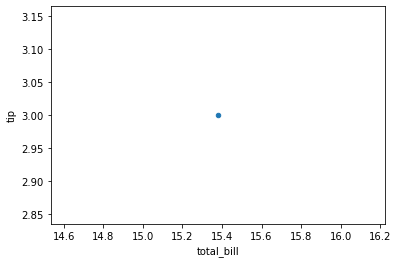

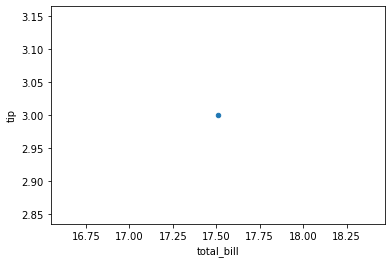

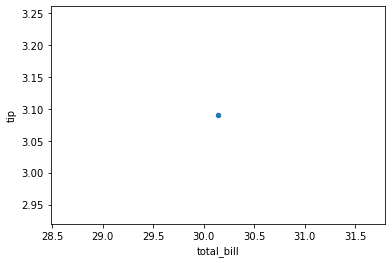

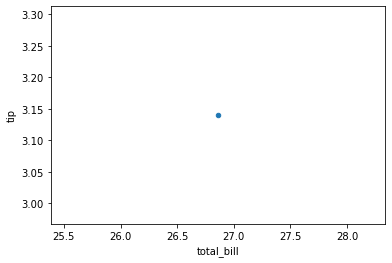

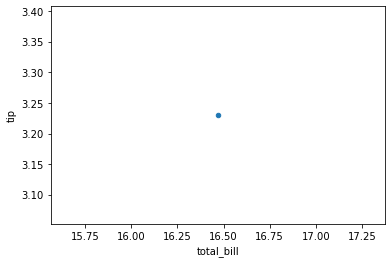

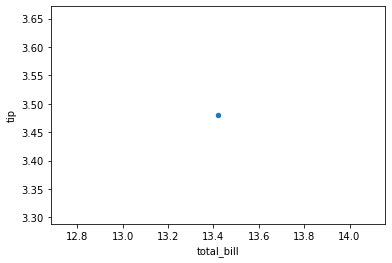

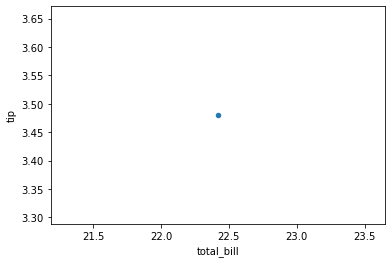

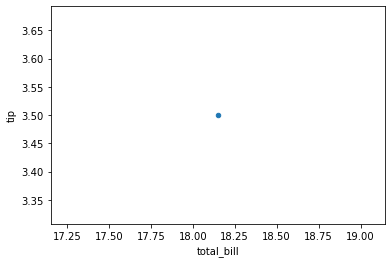

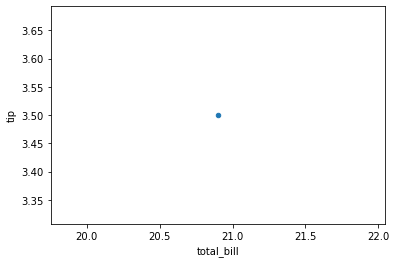

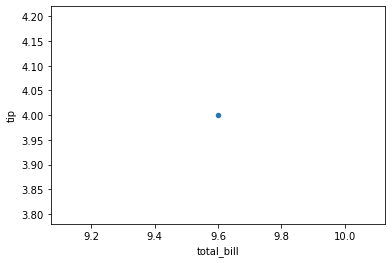

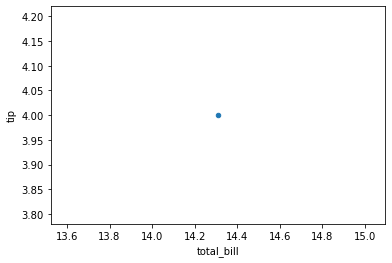

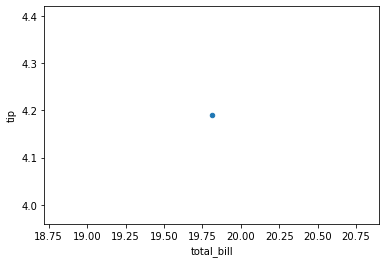

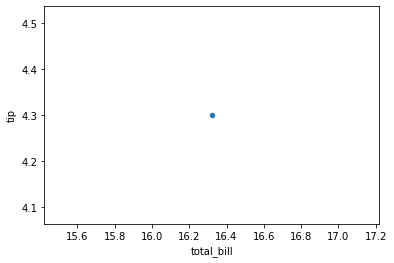

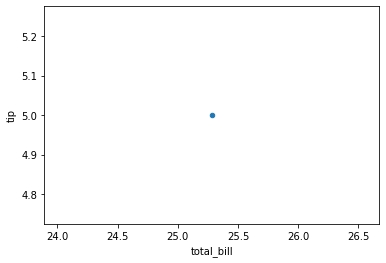

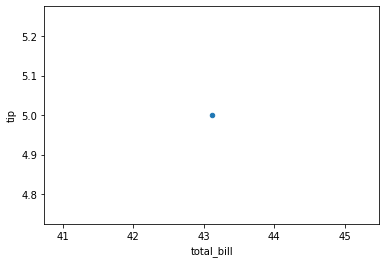

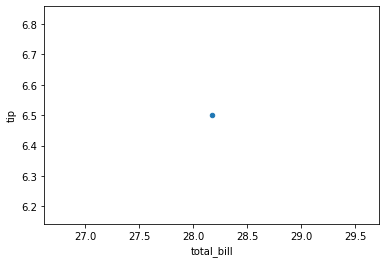

In [29]:
male_tip = data.groupby(['sex','smoker','tip','total_bill'])
#male_tip
male_tip.plot.scatter(x='total_bill', y='tip')

## Сделайте выводы по анализу датасета и построенным графикам. По желанию можете продолжить анализ данных и также отразить это в выводах.

In [30]:
При анализе данного датасета можно сделать следующие выводы:
    - размер чека кореллирует с количеством оставленных чаевых
    - чаще всего проводят оплату, т.е. посещают заведения в пятницу
    - Во время ужина чаевые оставляют чаще

SyntaxError: invalid syntax (<ipython-input-30-36e7a8679558>, line 1)